<a href="https://colab.research.google.com/github/SuperYoungCoder/Machine-Learning-with-Python-Tensorflow/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Basic regression: Predict fuel efficiency

Initial setup

In [ ]:
# This code uses the Keras API

# Use seaborn for pairplot.
!pip install -q seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1. Get the data

In [69]:
# The Auto MPG dataset - get the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


2. Clean the data

In [43]:
# Clean the data
dataset.isna().sum()
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


3. Split the data into training and test sets

In [68]:
# Split the data into training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(train_dataset)
print(test_dataset)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
146  28.0          4          90.0        75.0  2125.0          14.5   
282  22.3          4         140.0        88.0  2890.0          17.3   
69   12.0          8         350.0       160.0  4456.0          13.5   
378  38.0          4         105.0        63.0  2125.0          14.7   
331  33.8          4          97.0        67.0  2145.0          18.0   
..    ...        ...           ...         ...     ...           ...   
281  19.8          6         200.0        85.0  2990.0          18.2   
229  16.0          8         400.0       180.0  4220.0          11.1   
150  26.0          4         108.0        93.0  2391.0          15.5   
145  32.0          4          83.0        61.0  2003.0          19.0   
182  28.0          4         107.0        86.0  2464.0          15.5   

     Model Year  Europe  Japan  USA  
146          74       0      0    1  
282          79       0      0    1  
69           72      

4. Inspect the data

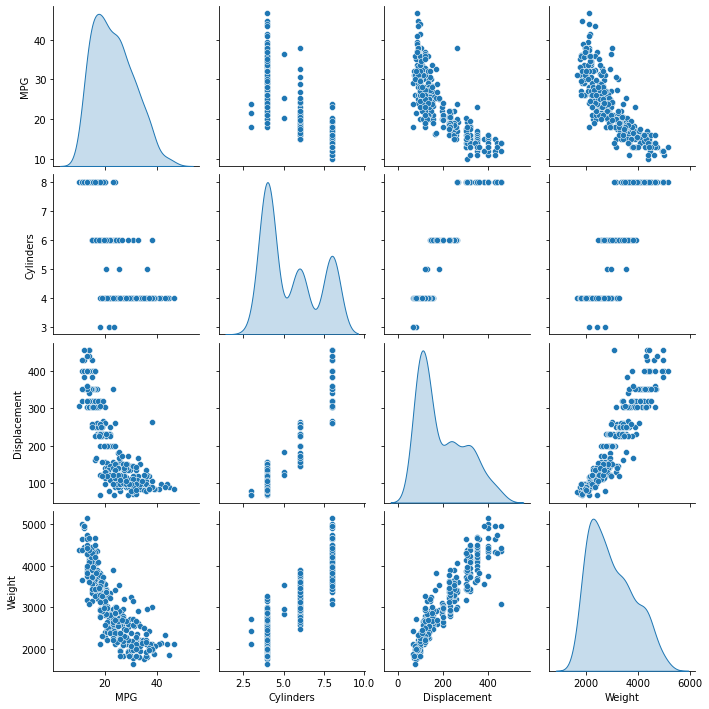

In [70]:
# Inspect the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

5. Split features from labels

In [71]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

II. Normalization
1. The Normalization layer

In [72]:
# The Normalization layer
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


III. Linear regression
1. Linear regression with one variable

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_38 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_63 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


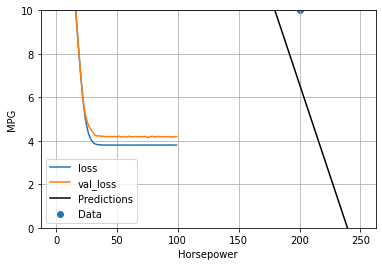

In [73]:
# Linear regression
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
horsepower_model = tf.keras.Sequential([
                                        horsepower_normalizer,
                                        layers.Dense(units=1)
])
horsepower_model.summary()
# Note 4: this model will predict 'MPG' from 'Horsepower'.
horsepower_model.predict(horsepower[:10])
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
# Training
%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
plot_horsepower(x, y)

2. Linear regression with multiple inputs

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_37 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_64 (Dense)            (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


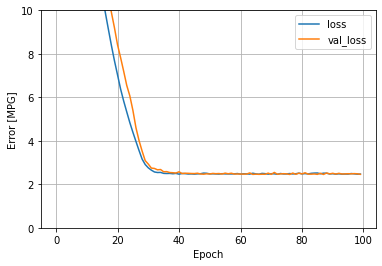

In [74]:
# Linear regression with multiple inputs
linear_model = tf.keras.Sequential([
                                    normalizer,
                                    layers.Dense(units=1)
])
linear_model.summary()
linear_model.predict(train_features[:10])
linear_model.layers[1].kernel
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)
# Training
%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # suppress logging.
    verbose=0,
    # Caculate validation results on 20% of the training data.
    validation_split= 0.2
)
plot_loss(history)
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0
)


IV. Regression with a Deep Neural Network

In [75]:
# Regression with a deep neural network
def build_and_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(64, activation='relu'),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

1. Regression using a DNN and a signle input

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_38 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_65 (Dense)            (None, 64)                128       
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 dense_67 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


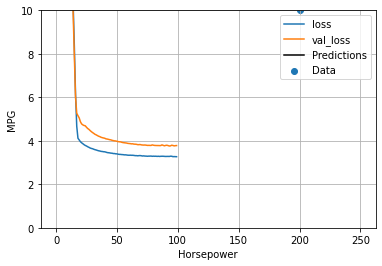

In [76]:
# Regression using a DNN and a single input: 'Horsepower'
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()
%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

2. Regression using a DNN and multiple inputs

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_37 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_68 (Dense)            (None, 64)                640       
                                                                 
 dense_69 (Dense)            (None, 64)                4160      
                                                                 
 dense_70 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


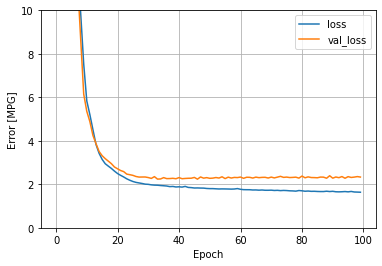

In [77]:
# Regression using a DNN and multiple inputs
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()
%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

V. Performance

In [79]:
# Performance
pd.DataFrame(test_results, index=['Mean absolute error [MPG]'])


,horsepower_model,linear_model,dnn_horsepower_model,dnn_model
Mean absolute error [MPG],3.646752,2.471909,2.940464,1.676345


1. Make predictions

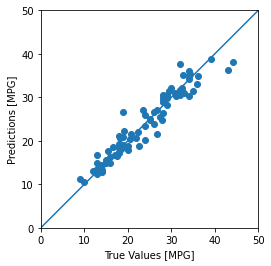

In [80]:
# Make Predictions
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

2. Error distribution

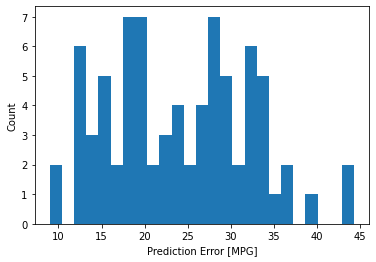

In [81]:
# Error distribution
error = rest_predictions = test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

3. Saving the model

In [82]:
# Saving the model
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


4. Rerunning the model

In [83]:
# Rerunning the model
reloaded = tf.keras.models.load_model('dnn_model')
test_results['reloaded'] = reloaded.evaluate(
	test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]'])

,horsepower_model,linear_model,dnn_horsepower_model,dnn_model,reloaded
Mean absolute error [MPG],3.646752,2.471909,2.940464,1.676345,1.676345
